# 🧠 Topic Modeling with NMF

This notebook performs topic modeling using TF-IDF and NMF on escort ad descriptions.

🧠 Topic 1: massage, body, sensual, relaxation, available, service, private, experience, deep, relaxing
🧠 Topic 2: looking, fun, host, discreet, guy, trans, let, good, meet, travel
🧠 Topic 3: hi, girl, real, like, experience, sexy, beautiful, make, 100, skin
🧠 Topic 4: text, young, sexy, 329, 562, prefered, 0406, ashburton, hello, ladyboy
🧠 Topic 5: time, friendly, easy, going, years, female, therapist, busy, excellent, supportive
🧠 Topic 6: fuck, pussy, love, want, cock, sex, need, suck, man, horny


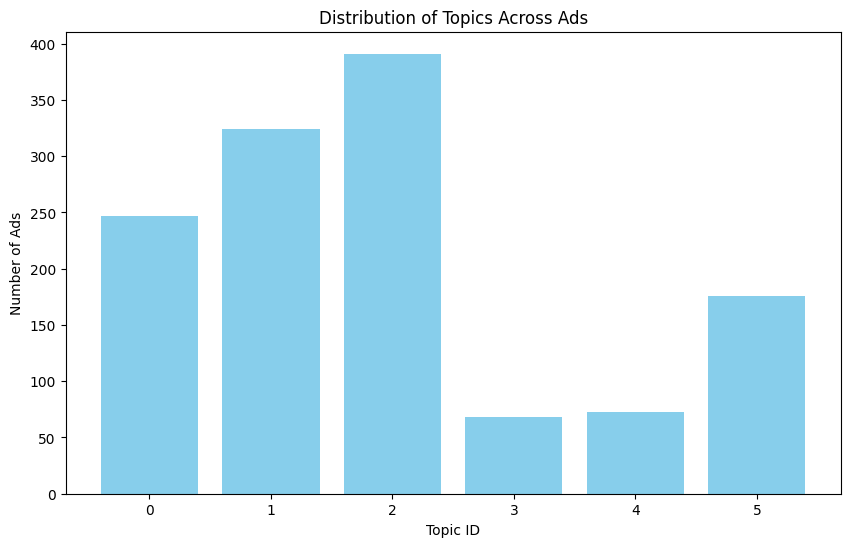

✅ Topic modeling complete. Saved to: /Users/mariaanthoniez/Documents/AI-agent-Transpulse/data/enriched/all_profiles_topics.csv


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# === Paths ===
BASE_DIR = os.path.abspath(os.path.join(os.path.dirname("__file__"), "../"))
input_path = os.path.join(BASE_DIR, "data", "processed", "all_profiles.csv")
output_path = os.path.join(BASE_DIR, "data", "enriched", "all_profiles_topics.csv")

# === Load Data ===
df = pd.read_csv(input_path)
df["description"] = df["description"].fillna("")

# === TF-IDF Vectorization ===
tfidf = TfidfVectorizer(
    max_df=0.9, min_df=5,
    stop_words="english", max_features=1000
)
X = tfidf.fit_transform(df["description"])

# === Topic Modeling with NMF ===
n_topics = 6
nmf = NMF(n_components=n_topics, random_state=42)
topic_matrix = nmf.fit_transform(X)

# === Top Words per Topic ===
feature_names = tfidf.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(nmf.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    topics.append(", ".join(top_words))
    print(f"🧠 Topic {topic_idx + 1}: {', '.join(top_words)}")

# === Assign Topics ===
df["topic_id"] = topic_matrix.argmax(axis=1)
df["topic_keywords"] = df["topic_id"].apply(lambda x: topics[x])

# === Plot Distribution of Topics ===
topic_counts = df["topic_id"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(topic_counts.index, topic_counts.values, color="skyblue")
plt.xlabel("Topic ID")
plt.ylabel("Number of Ads")
plt.title("Distribution of Topics Across Ads")
plt.xticks(range(n_topics))
plt.show()

# === Save Results ===
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)
print(f"✅ Topic modeling complete. Saved to: {output_path}")

In [2]:
# === Show Top 3 Sample Ads per Topic ===
pd.set_option("display.max_colwidth", 200)

for topic in range(n_topics):
    print(f"\n🧠 Topic {topic} — Keywords: {topics[topic]}")
    sample = df[df["topic_id"] == topic].sort_values(by="description", key=lambda x: x.str.len(), ascending=False).head(3)
    display(sample[["title", "description", "location", "category", "topic_keywords"]])


🧠 Topic 0 — Keywords: massage, body, sensual, relaxation, available, service, private, experience, deep, relaxing


,title,description,location,category,topic_keywords
556,Full body Erotic massage with young fit bi male,"Escape into Deep Sensual Bliss. Erotic Full Body Massage for Men I m a 6 3 American living in Australia, with a warm, friendly energy and a strong, muscular physique. I create a space where you ca...",NaN,maleEscort,"massage, body, sensual, relaxation, available, service, private, experience, deep, relaxing"
807,GIGI SHE MALE NUDE EROTIC BODY SLIDE NORTH GEELONG 27YR - 27,"HI. There My name is GiGi from Thailand. I am a feminine, smooth and silky skin. I am offering a good massage and full service. I provide deep tissue massage and sexy nude full body relaxation bod...",NaN,transEscort,"massage, body, sensual, relaxation, available, service, private, experience, deep, relaxing"
477,Sexy Asian man with hot underwear for body rub,"My name is Tanner, and I m 35, gym fit Asian male, trained in Swedish and Remedial deep tissue massage, which is ideal for relieving tension and taking care of aches and pains. I have over 7 years...",NaN,maleEscort,"massage, body, sensual, relaxation, available, service, private, experience, deep, relaxing"



🧠 Topic 1 — Keywords: looking, fun, host, discreet, guy, trans, let, good, meet, travel


,title,description,location,category,topic_keywords
598,Gay Male escort for gay/bi/straightcurious males only,Hi everyone This is Karan here. I am an Indian gay bottom age 28 looking to have fun with males individually or in groups. I am based in point cook and giving in call and out call services. Please...,NaN,maleEscort,"looking, fun, host, discreet, guy, trans, let, good, meet, travel"
1123,MELBOURNE MALE ESCORTS WANTED!,We at A Gentleman Caller are looking for fresh new talent. If you feel you have the right temperament and sophistication to become a male escort Please visit our website and fill out the online ap...,NaN,jobs,"looking, fun, host, discreet, guy, trans, let, good, meet, travel"
1050,***Topless Waitresses & Hot Strippers Geelong ***,"Party in Geelong Call / WHATSAPP me Jenna anytime to book me or my Super fun and Hot Topless Waitresses, poker dealers or XXX Strippers for your event in Geelong and surrounds Don t risk booking a...",NaN,jobs,"looking, fun, host, discreet, guy, trans, let, good, meet, travel"



🧠 Topic 2 — Keywords: hi, girl, real, like, experience, sexy, beautiful, make, 100, skin


,title,description,location,category,topic_keywords
1174,PocketPimp.app is here to help make a better business out of you,"Welcome to the PocketPimp App, designed specifically for the unique challenges of the sex work industry in Australia. Whether you ve been in the game for a lifetime or you re just getting started,...",NaN,jobs,"hi, girl, real, like, experience, sexy, beautiful, make, 100, skin"
974,YOUNG CD COCO FULL SERVICE,"YOUG BROWN CD COCO FOR FULL SERVICE TONIGHT CAN HOST IN CRANBOURNE HI SEXY PEOPLE, HOPE ALL OF YOU HORNY MEN ARE DOING WELL. I AM CD COCO AND I HAVE EXOTIC SKIN. I OFFER FULL SERVICE 130 FULL SERV...",NaN,transEscort,"hi, girl, real, like, experience, sexy, beautiful, make, 100, skin"
413,"Meet Craigieburn Sexy Babe Melt ur cock, SUCK U Dry!",New Vitality Meridian Instrument. Help to Eliminates prostate problems and enhances male sexual ability No more pain and troubles Learn more on our website New Beautiful Hot Girls Available They c...,NaN,massage,"hi, girl, real, like, experience, sexy, beautiful, make, 100, skin"



🧠 Topic 3 — Keywords: text, young, sexy, 329, 562, prefered, 0406, ashburton, hello, ladyboy


,title,description,location,category,topic_keywords
744,Hard Cock Ladyboy Massage In City,PRIVATE MASSAGE Hello all my gentlemen I know you re looking for something new or something special. here I am ready to please your need also super fun i would love to give you a naughty massage p...,NaN,transEscort,"text, young, sexy, 329, 562, prefered, 0406, ashburton, hello, ladyboy"
129,Cranbourne area mature Asian cougar Extras available,"Hello, Text Only 0401 708 331 my name is Emily experienced Asian Cougar 45 years full service including excellent oral great attitude, great experience, sexy body, clean pussy, high desire for sex...",NaN,femaleEscort,"text, young, sexy, 329, 562, prefered, 0406, ashburton, hello, ladyboy"
783,Margie 8inch XXXL COCK & BIGCUM MEL CENTRAL,"Available now for booking Text or call : 0420534144 Price for everything pls text More extra and service please text me MAGIC HANDS Young Asian, Good looking with Slim Body providing FULL BODY rel...",NaN,transEscort,"text, young, sexy, 329, 562, prefered, 0406, ashburton, hello, ladyboy"



🧠 Topic 4 — Keywords: time, friendly, easy, going, years, female, therapist, busy, excellent, supportive


,title,description,location,category,topic_keywords
1094,Seaside Angels - NOW hiring female massage therapist,"Hey ladies, Are you just starting out or are you thinking about finding a new place to work A female massage therapist is needed to join our beautiful team at our professional establishment. We wo...",NaN,jobs,"time, friendly, easy, going, years, female, therapist, busy, excellent, supportive"
779,Well Educated Ladyboy Massage in Burwood,"Well educated TS offering excellent massage and company, down to earth and decent. Graduated from the University of Melbourne. I am the shemale that is not only gorgeous to look at, but also good ...",Melbourne,transEscort,"time, friendly, easy, going, years, female, therapist, busy, excellent, supportive"
96,"Bendigo New to Town, Private Sexy Playful Escort Incall Outcall","Hello gentlemen, I am a 21 years old Sexy girl you ve always dreamed of I m an excellent companion, as well as for the naughtier. I adore making men feel like royalty, because as far as I am conce...",NaN,femaleEscort,"time, friendly, easy, going, years, female, therapist, busy, excellent, supportive"



🧠 Topic 5 — Keywords: fuck, pussy, love, want, cock, sex, need, suck, man, horny


,title,description,location,category,topic_keywords
41,3some fun. Party girls with big boob Nat/ PSE/ GFE/ available,"-0424530855 Hello. Cola here want fuck all different men. I m beautiful and attractive sexy lips with my big boobs, love to play with different type men. Do u want come and fuck me in between 2 le...",NaN,femaleEscort,"fuck, pussy, love, want, cock, sex, need, suck, man, horny"
910,TRADIE Deep Throat Relief,Are you a horny Tradie aching for release after being pussy teased all weekend. I m a good looking Eurasian male sissy cocksucker who specializes in oral relief for str8 men who love pussy but enj...,NaN,transEscort,"fuck, pussy, love, want, cock, sex, need, suck, man, horny"
173,"Deep Thrusts Only, No Soft Boys","Deep Thrusts Only, No Soft Boys I am very sexy lady. I want to do enjoy with any person and any age. I am staying home alone. I m so hungry. No games no drama. Serious man only. please came my hom...",NaN,femaleEscort,"fuck, pussy, love, want, cock, sex, need, suck, man, horny"


In [3]:
# === Export Top Ads per Topic to CSV ===
export_path = os.path.join(BASE_DIR, "data", "exports", "top_ads_by_topic.csv")
os.makedirs(os.path.dirname(export_path), exist_ok=True)

top_ads_list = []

for topic in range(n_topics):
    sample = df[df["topic_id"] == topic].sort_values(by="description", key=lambda x: x.str.len(), ascending=False).head(3)
    top_ads_list.append(sample[["title", "description", "location", "category", "topic_id", "topic_keywords"]])

top_ads_df = pd.concat(top_ads_list)
top_ads_df.to_csv(export_path, index=False)
print(f"✅ Top 3 ads per topic saved to: {export_path}")

✅ Top 3 ads per topic saved to: /Users/mariaanthoniez/Documents/AI-agent-Transpulse/data/exports/top_ads_by_topic.csv
